
Summary statistics:
                age         job  marital  education in_default       balance  \
count   4521.000000        4521     4521       4521       4521   4521.000000   
unique          NaN          12        3          4          2           NaN   
top             NaN  management  married  secondary         no           NaN   
freq            NaN         969     2797       2306       4445           NaN   
mean      41.170095         NaN      NaN        NaN        NaN   1422.657819   
std       10.576211         NaN      NaN        NaN        NaN   3009.638142   
min       19.000000         NaN      NaN        NaN        NaN  -3313.000000   
25%       33.000000         NaN      NaN        NaN        NaN     69.000000   
50%       39.000000         NaN      NaN        NaN        NaN    444.000000   
75%       49.000000         NaN      NaN        NaN        NaN   1480.000000   
max       87.000000         NaN      NaN        NaN        NaN  71188.000000   

       housing  lo

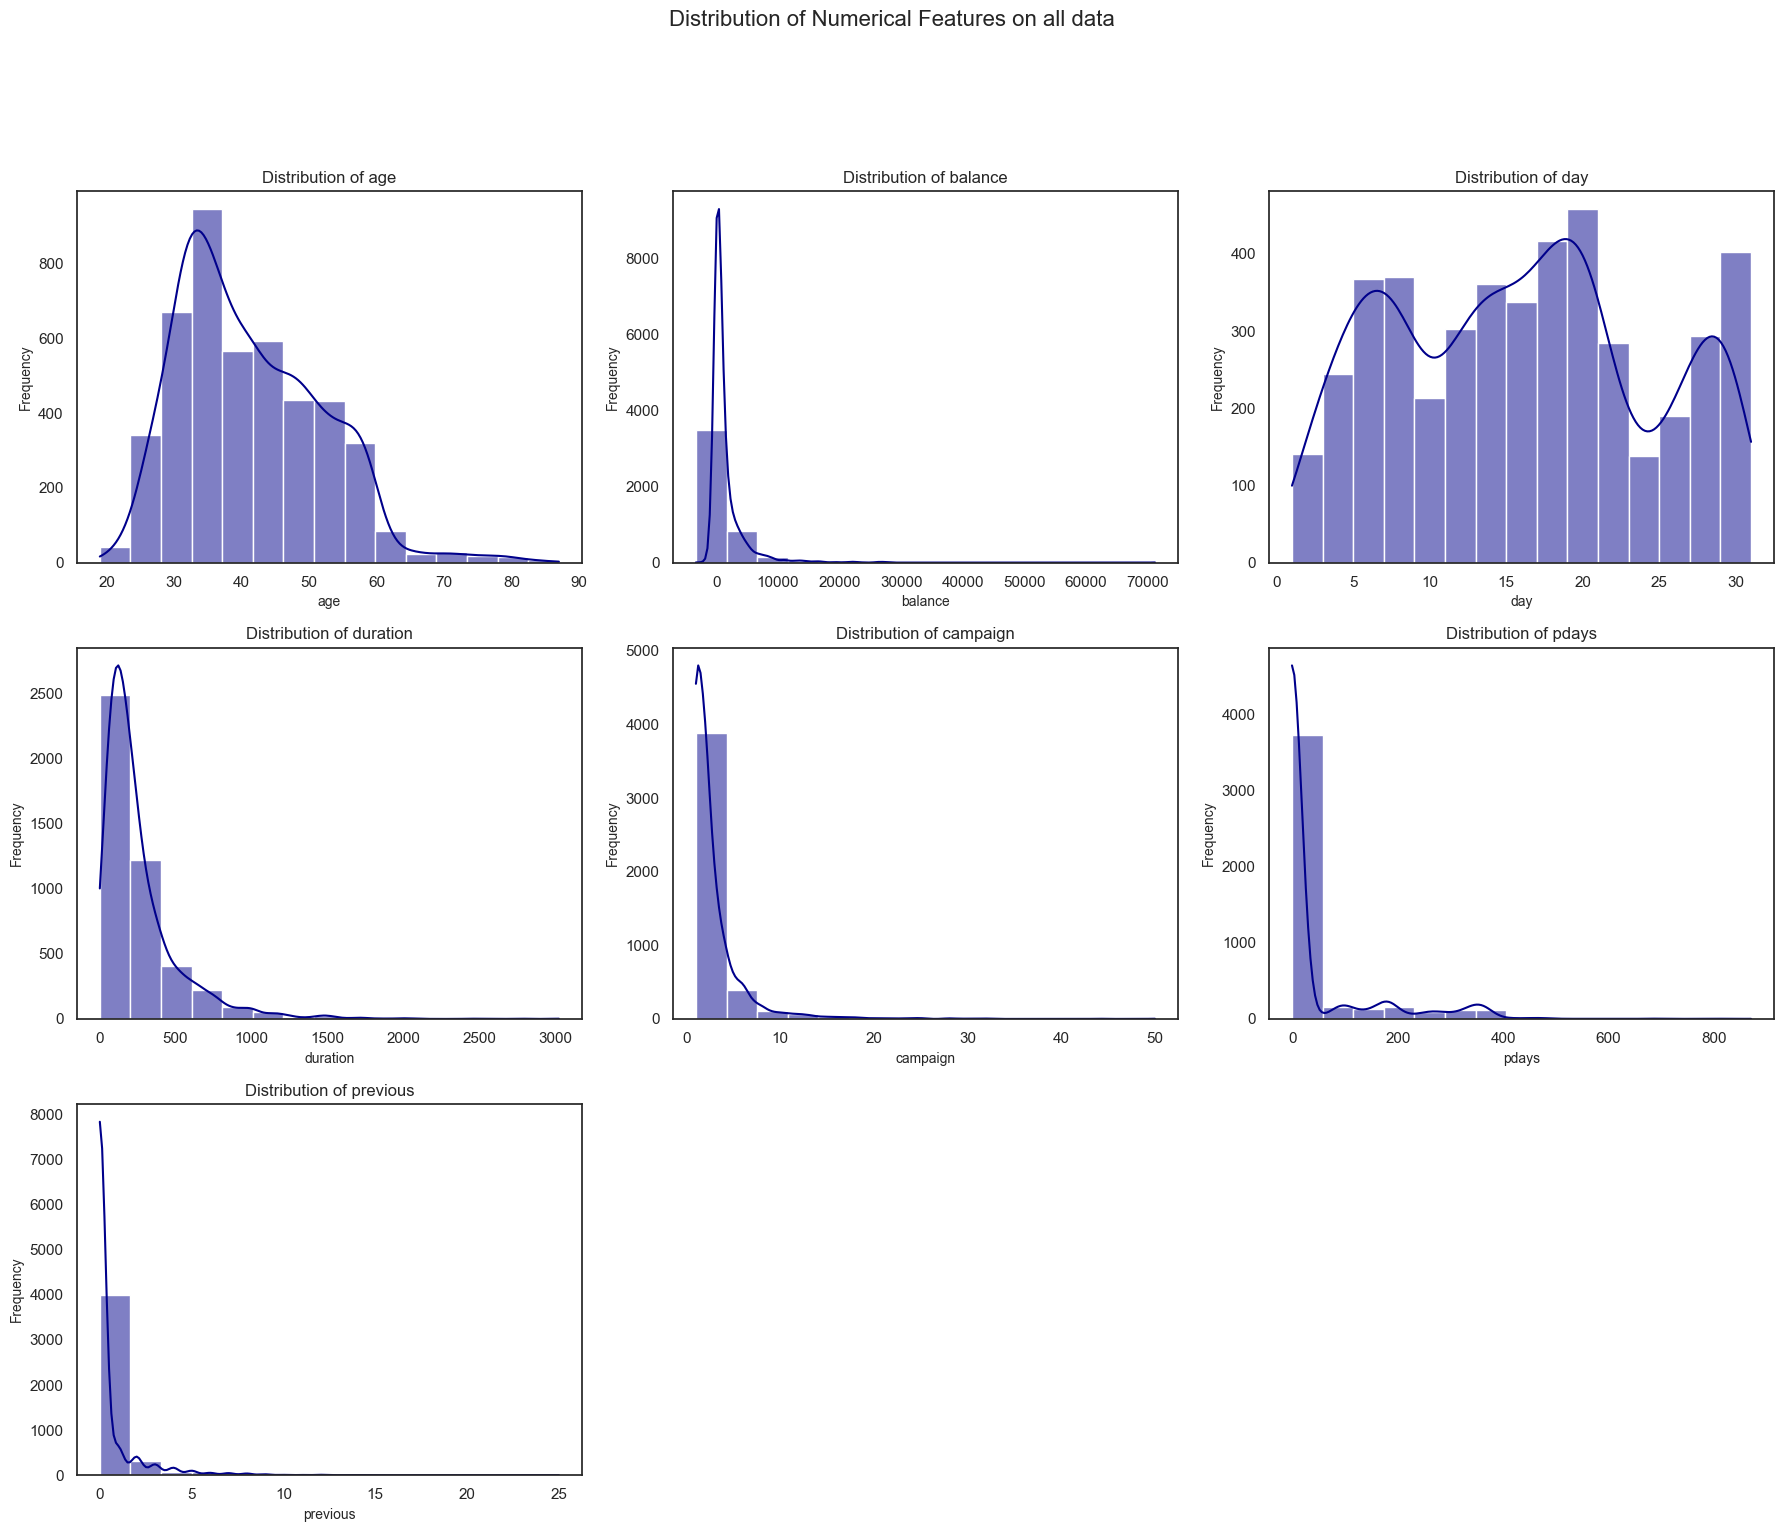

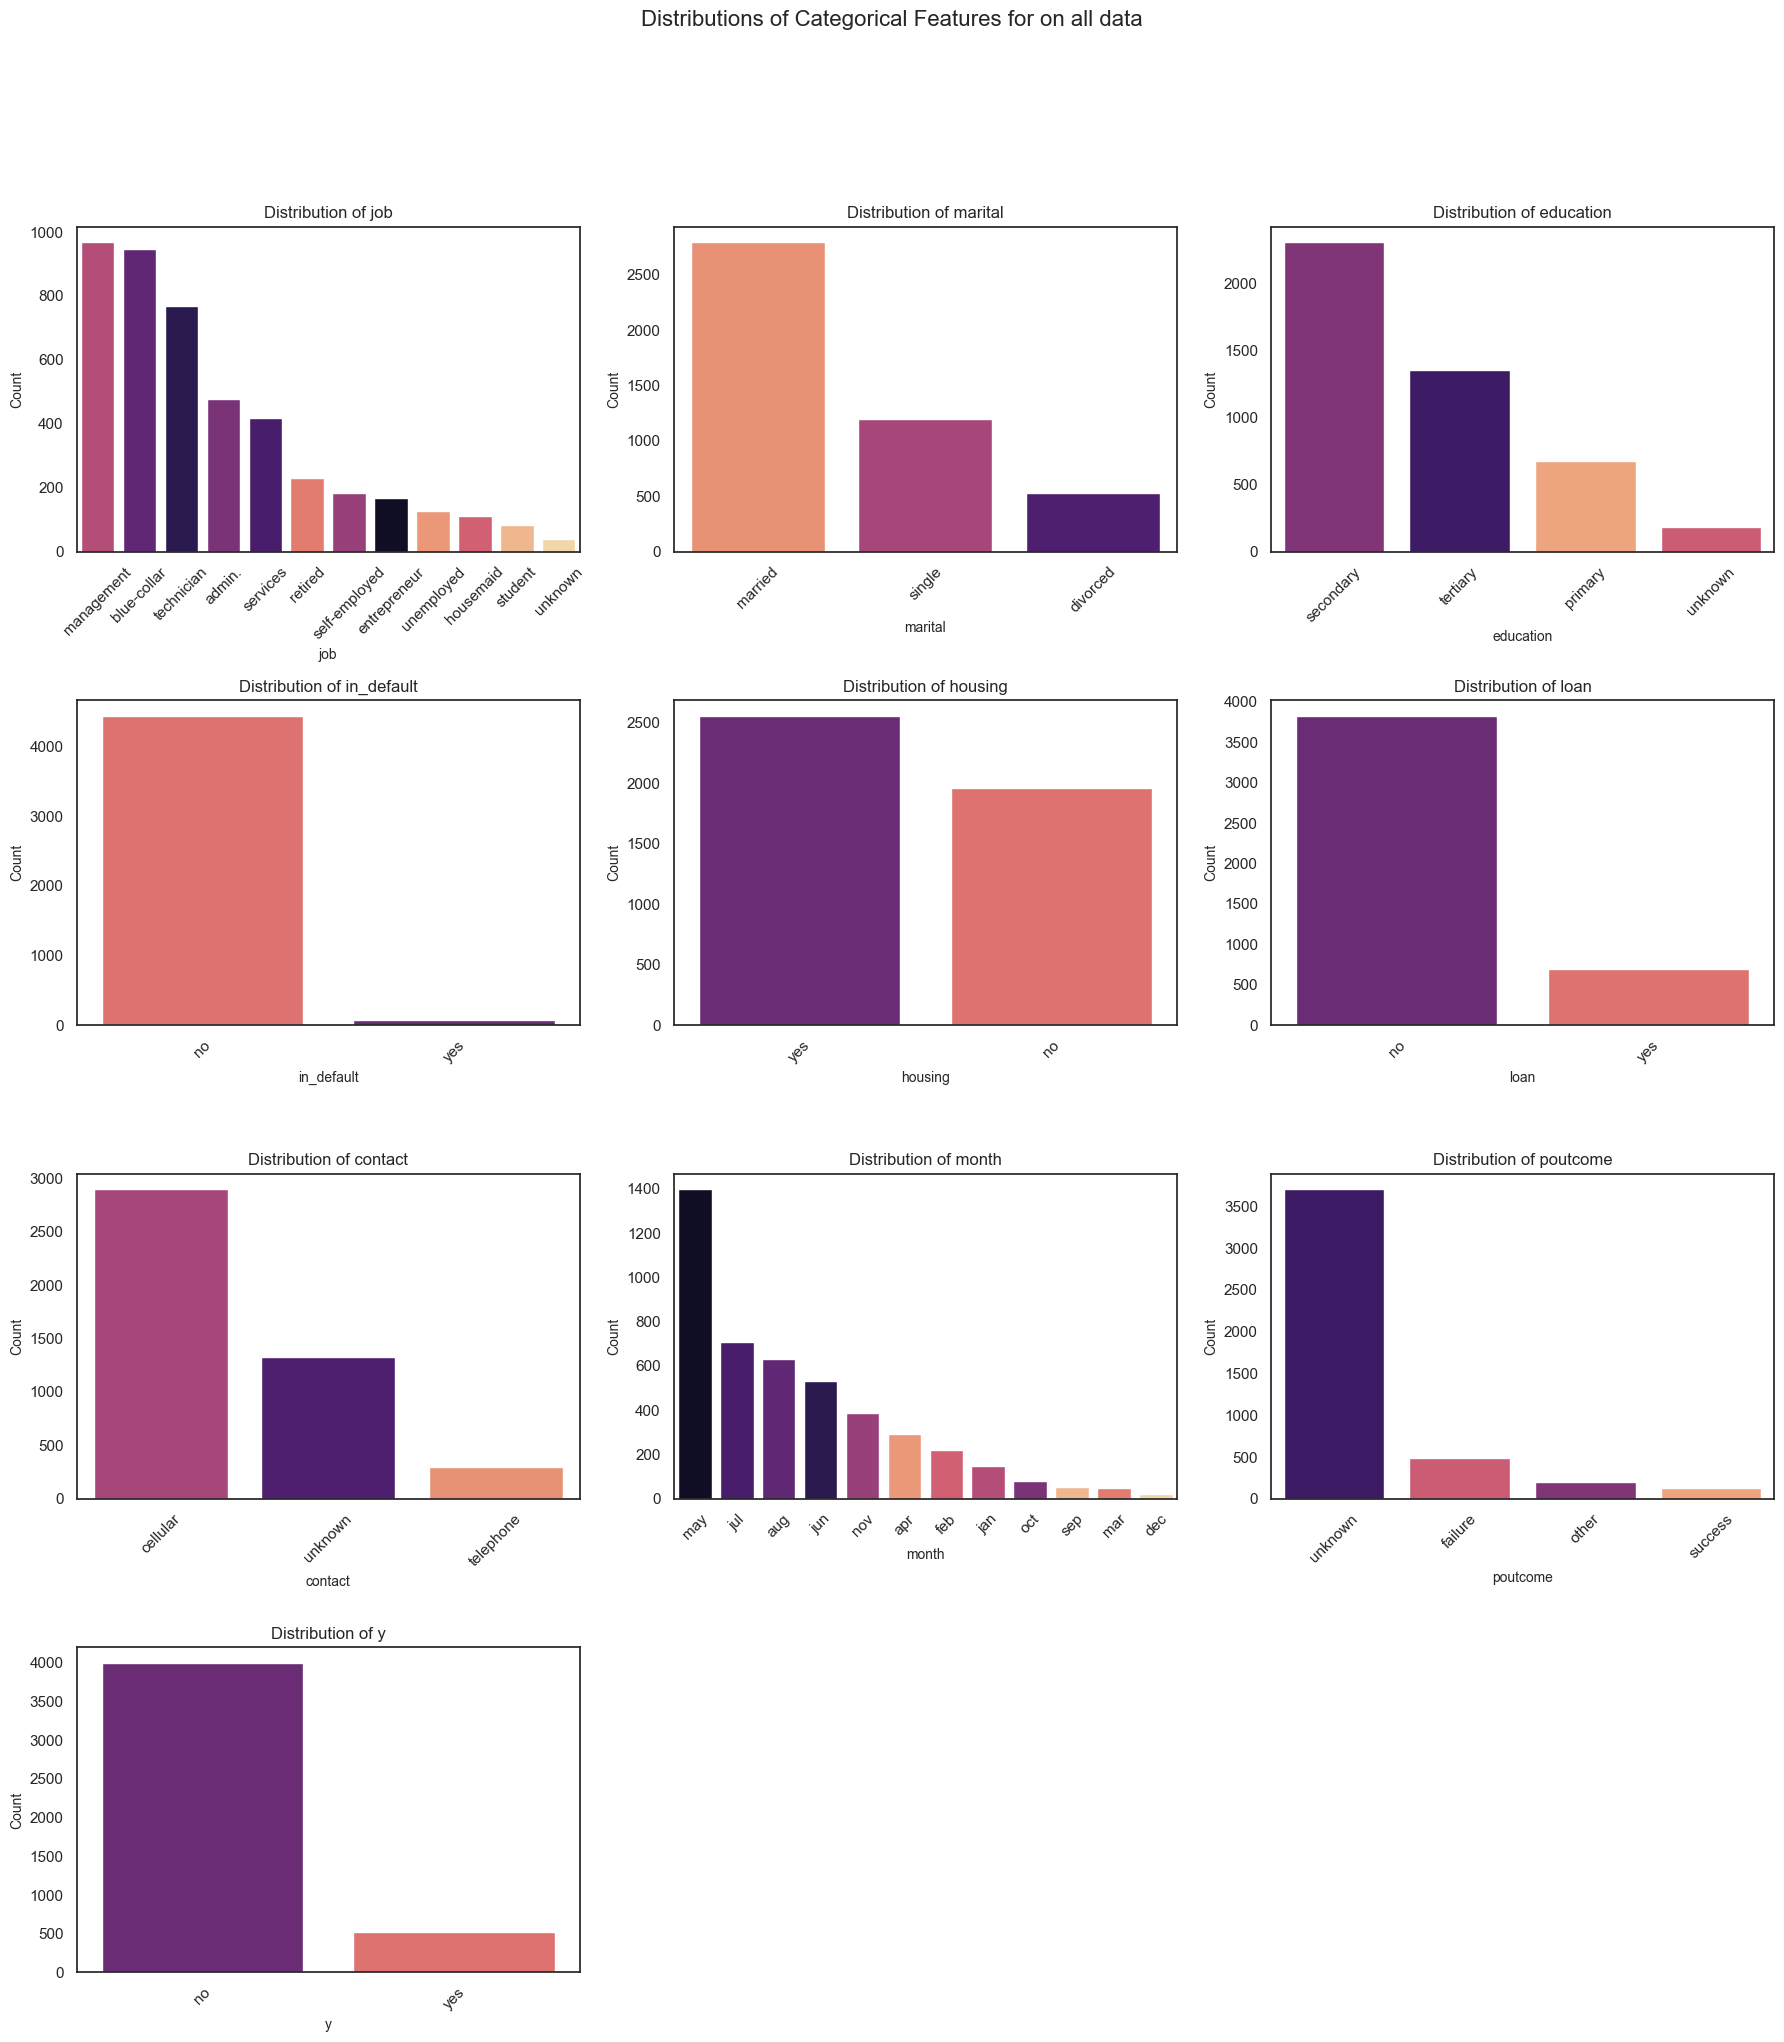

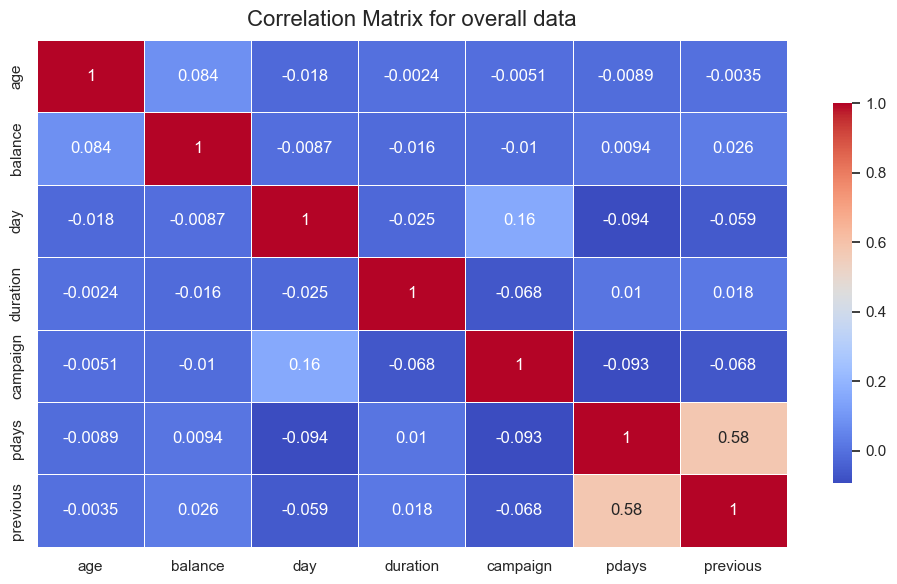

Correlation Matrix Table:
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000


In [96]:
"""This module performs exploratory data analysis (EDA) on the data. It focuses on records with 'yes' or 'no' in the 'y' column. 
It tests the data for multicollinearity."""

#importing libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import math
import matplotlib.colors as mcolors  

#connecting to database
try:
    database_path = "data/data.db"
    conn = sqlite3.connect(database_path)
    query = open('data/fetch_all.sql', 'r').read()
    df = pd.read_sql_query(query, conn)
except (sqlite3.Error, FileNotFoundError) as e:
    print(f"An error occurred: {e}")
finally:
    if 'conn' in locals():
        conn.close()

# Defining general plotting functions for EDA:

import seaborn as sns
import matplotlib.pyplot as plt
import math
# Set a consistent theme
sns.set_theme(style="white")


# Function to plot numerical features
def plot_numerical_features(data_source, chart_name):
    numerical_features = data_source.select_dtypes(include=['int64', 'float64']).columns

    if not numerical_features.empty:
        n_features = len(numerical_features)
        n_cols = 3  # Fixed number of columns for consistent layout
        n_rows = math.ceil(n_features / n_cols)

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
        axes = axes.flatten()

        for i, feature in enumerate(numerical_features):
            sns.histplot(data=data_source, x=feature, bins=15, ax=axes[i], kde=True, color="darkblue")
            axes[i].set_title(f"Distribution of {feature}", fontsize=12)
            axes[i].set_xlabel(feature, fontsize=10)
            axes[i].set_ylabel("Frequency", fontsize=10)

        # Remove unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        fig.suptitle(chart_name, fontsize=16, y=1.02)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
    else:
        print("No numerical features found.")

# Function to plot categorical features
def plot_categorical_features(data_source, number_of_columns, data_selection_name):
    categorical_features = data_source.select_dtypes(include=['object']).columns
    n_features = len(categorical_features)
    n_cols = number_of_columns
    n_rows = math.ceil(n_features / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
    axes = axes.flatten()

    for i, feature in enumerate(categorical_features):
        sns.countplot(
            data=data_source,
            x=feature,
            hue=feature,  # Assign x variable to hue
            ax=axes[i],
            palette="magma",
            legend=False,  # Suppress legend for clarity
            order=data_source[feature].value_counts().index
        )
        axes[i].set_title(f"Distribution of {feature}", fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylabel("Count", fontsize=10)
        axes[i].set_xlabel(feature, fontsize=10)

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"Distributions of Categorical Features for {data_selection_name}", fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Function to create a correlation matrix
def correlation_matrix(data_source, matrix_name):
    numerical_features = data_source.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = data_source[numerical_features].corr()

    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, cbar_kws={'shrink': 0.75})
    plt.title(f"Correlation Matrix for {matrix_name}", fontsize=16, pad=10)
    plt.tight_layout()
    plt.show()

    print("Correlation Matrix Table:")
    print(correlation_matrix)


# Filtering data for analysing the campaign results - filter only rows with 'yes' or 'no' in the 'y' column
df = df[df['y'].isin(['no', 'yes'])]

# Drop unwanted columns
df = df.drop(columns=['client_id', 'account_id', 'campaign_id', 'outcome_id'])

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))


# Plotting distribution of numerical features of all data

plot_numerical_features(df, "Distribution of Numerical Features on all data")

# Plotting distribution of categorical features of all data
plot_categorical_features(df, 3, "on all data")

# Plotting distribution of numerical features of all data
correlation_matrix(df, "overall data")


Defining functions on categorical data and yes/no responses

C:\Users\pycho\AppData\Local\Temp\ipykernel_3312\3745080168.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_counts.index, y=y_counts.values, palette="magma")


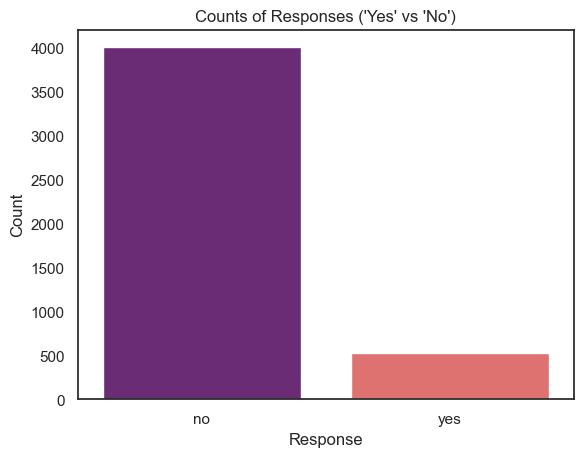

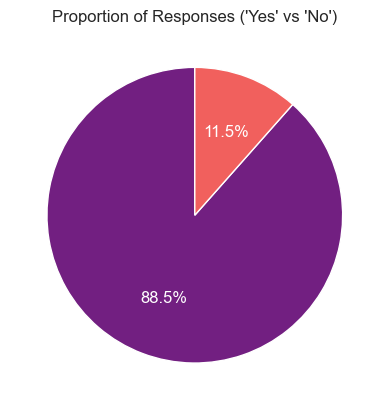

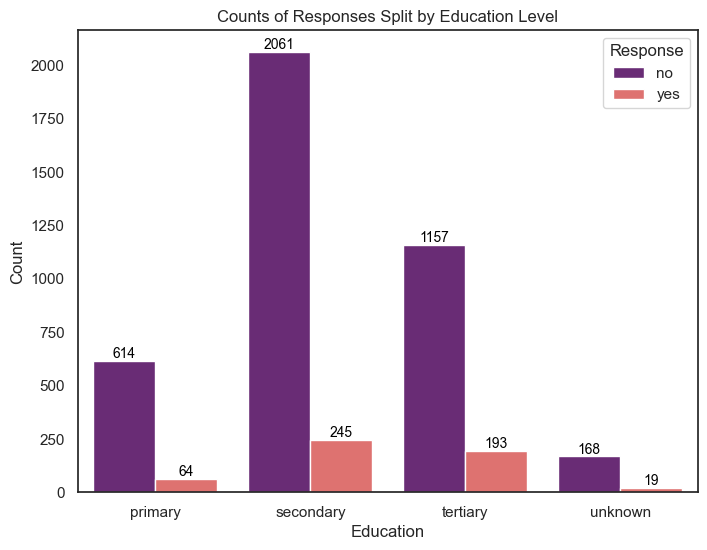

In [97]:
y_counts = df['y'].value_counts()

# Create a bar plot
sns.barplot(x=y_counts.index, y=y_counts.values, palette="magma")
plt.title("Counts of Responses ('Yes' vs 'No')")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

# Count occurrences of 'yes' and 'no'
y_counts = df['y'].value_counts()

# Create a pie chart
colors = sns.color_palette("magma", len(y_counts))

#pie chart
plt.pie(
    y_counts.values,
    labels=y_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'color': 'white'}  # Set text color to white
)
plt.title("Proportion of Responses ('Yes' vs 'No')")
plt.show()

grouped_data = df.groupby(['education', 'y']).size().reset_index(name='count')



# Create a grouped bar chart
grouped_data = df.groupby(['education', 'y']).size().reset_index(name='count')

# Create a grouped bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=grouped_data, x='education', y='count', hue='y', palette="magma")

# Add values above the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

# Add labels and title
plt.title("Counts of Responses Split by Education Level")
plt.xlabel("Education")
plt.ylabel("Count")
plt.legend(title="Response")
plt.show()

Testing the balance

Average balance of people who said yes: 1571.9558541266795
Median balance of people who said yes: 710.0


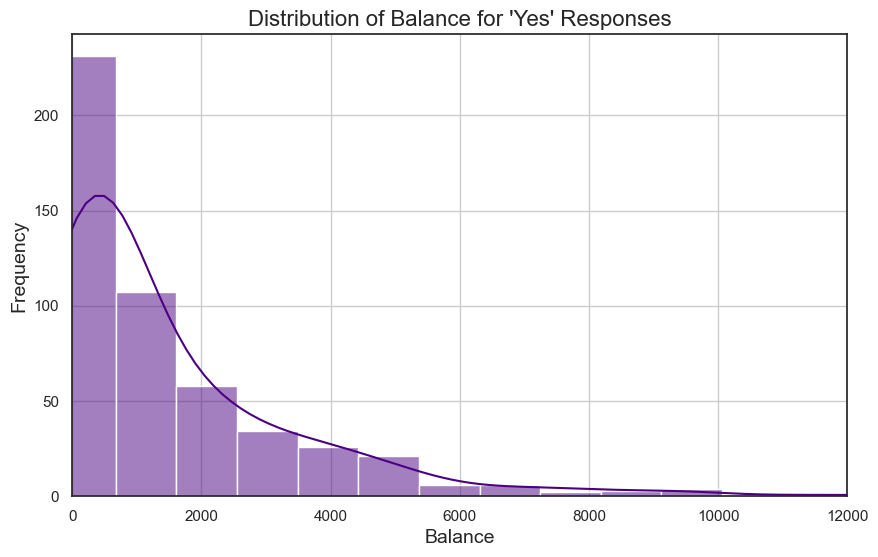

In [98]:
#average and median  balance of people who said yes
average_balance_yes = df_campaign_yes["balance"].mean()
median_balance_yes = df_campaign_yes["balance"].median()

print(f"Average balance of people who said yes: {average_balance_yes}")
print(f"Median balance of people who said yes: {median_balance_yes}")
sns.set_theme(style="white")
# Plot the distribution of the 'balance' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df_campaign_yes, x="balance", kde=True, color="#4B0082", bins=30)  # Dark purple color (hex code)

# Limit the x-axis to eliminate extremes
plt.xlim(0, 12000)

# Add labels and title
plt.title("Distribution of Balance for 'Yes' Responses", fontsize=16)
plt.xlabel("Balance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()



In [99]:
#bar charts for categorical features - defining functions
""" Creates grouped bar charts as subplots for up to three categorical features in the DataFrame, split by 'y'.

    Parameters:
    - data_source (pd.DataFrame): The source DataFrame.

    Returns:
    - None: Displays the charts in subplots. """

def grouped_bar_charts(data_source, name_of_plot):
    import math

    # Select categorical features (excluding 'y')
    categorical_features = [col for col in data_source.select_dtypes(include=['object']).columns if col != 'y']

    # Limit to three features for subplots
    categorical_features = categorical_features[:3]

    # Determine the number of rows and columns for subplots
    num_features = len(categorical_features)
    rows = math.ceil(num_features / 3)
    cols = min(num_features, 3)

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten() if num_features > 1 else [axes]  # Ensure axes is iterable

    # Create a bar chart for each categorical feature
    for i, x_col in enumerate(categorical_features):
        ax = axes[i]

        # Group the data by x_col and 'y' and count occurrences
        grouped_data = data_source.groupby([x_col, 'y']).size().reset_index(name='count')

        # Create the bar chart
        sns.barplot(data=grouped_data, x=x_col, y='count', hue='y', palette="magma", ax=ax)

        # Rotate x-axis labels
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

        # Add values above the bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

        # Add labels and title
        ax.set_title(f"Counts of {x_col} Split by Responses (Yes/No)")
        ax.set_xlabel(x_col.capitalize())
        ax.set_ylabel("Count")
        ax.legend(title='Response')

    # Hide unused subplots if there are fewer than 3 features
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    fig.suptitle(name_of_plot, fontsize=20, y=1.02)  # Adjust y for spacing
    plt.tight_layout()
    plt.show()

# Analyzing features of numerical data - line charts - defining functions
""" Creates line charts for all numerical features in the given DataFrame as subplots, split by 'y', in a single column. 
Parameters:
    - data_source (pd.DataFrame): The source DataFrame.
Returns:
    - None: Displays the line charts in subplots.
    The chart with balance is limited as there was just one extreme"""

def plot_line_chart_numerical(data_source, plot_heading):
    # Select numerical features
     # Select numerical features
    numerical_features = data_source.select_dtypes(include=['number']).columns

    # Determine the number of rows and columns for subplots
    num_features = len(numerical_features)
    cols = 2  # Fixed number of columns
    rows = math.ceil(num_features / cols)

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten() if num_features > 1 else [axes]  # Ensure axes is iterable

    # Define colors using the magma palette
    colors = sns.color_palette("magma", 2)  # Two colors for 'yes' and 'no'

    for i, feature in enumerate(numerical_features):
        ax = axes[i]

        # Group data by numerical feature and 'y'
        grouped_data = data_source.groupby([feature, 'y']).size().unstack(fill_value=0)

        # Plot line chart
        grouped_data.plot(kind="line", marker="o", ax=ax, color=colors, legend=False)

        # Set a specific y-axis limit for the "balance" column
        if feature == "balance":
            ax.set_ylim(0, 150)

        # Remove ticks and spines
        ax.tick_params(left=False, bottom=False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Add labels and title
        ax.set_title(f"Line Chart for {feature.capitalize()}", fontsize=14)
        ax.set_xlabel(f"{feature.capitalize()}", fontsize=12)
        ax.set_ylabel("Count", fontsize=12)

    # Hide unused subplots if there are fewer features than subplot slots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Add a single legend for the entire figure
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title="Response (Yes/No)", loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=2)
    fig.suptitle(plot_heading, fontsize=20, y=1.02)  # Adjust y for spacing
    plt.tight_layout()
    plt.show()




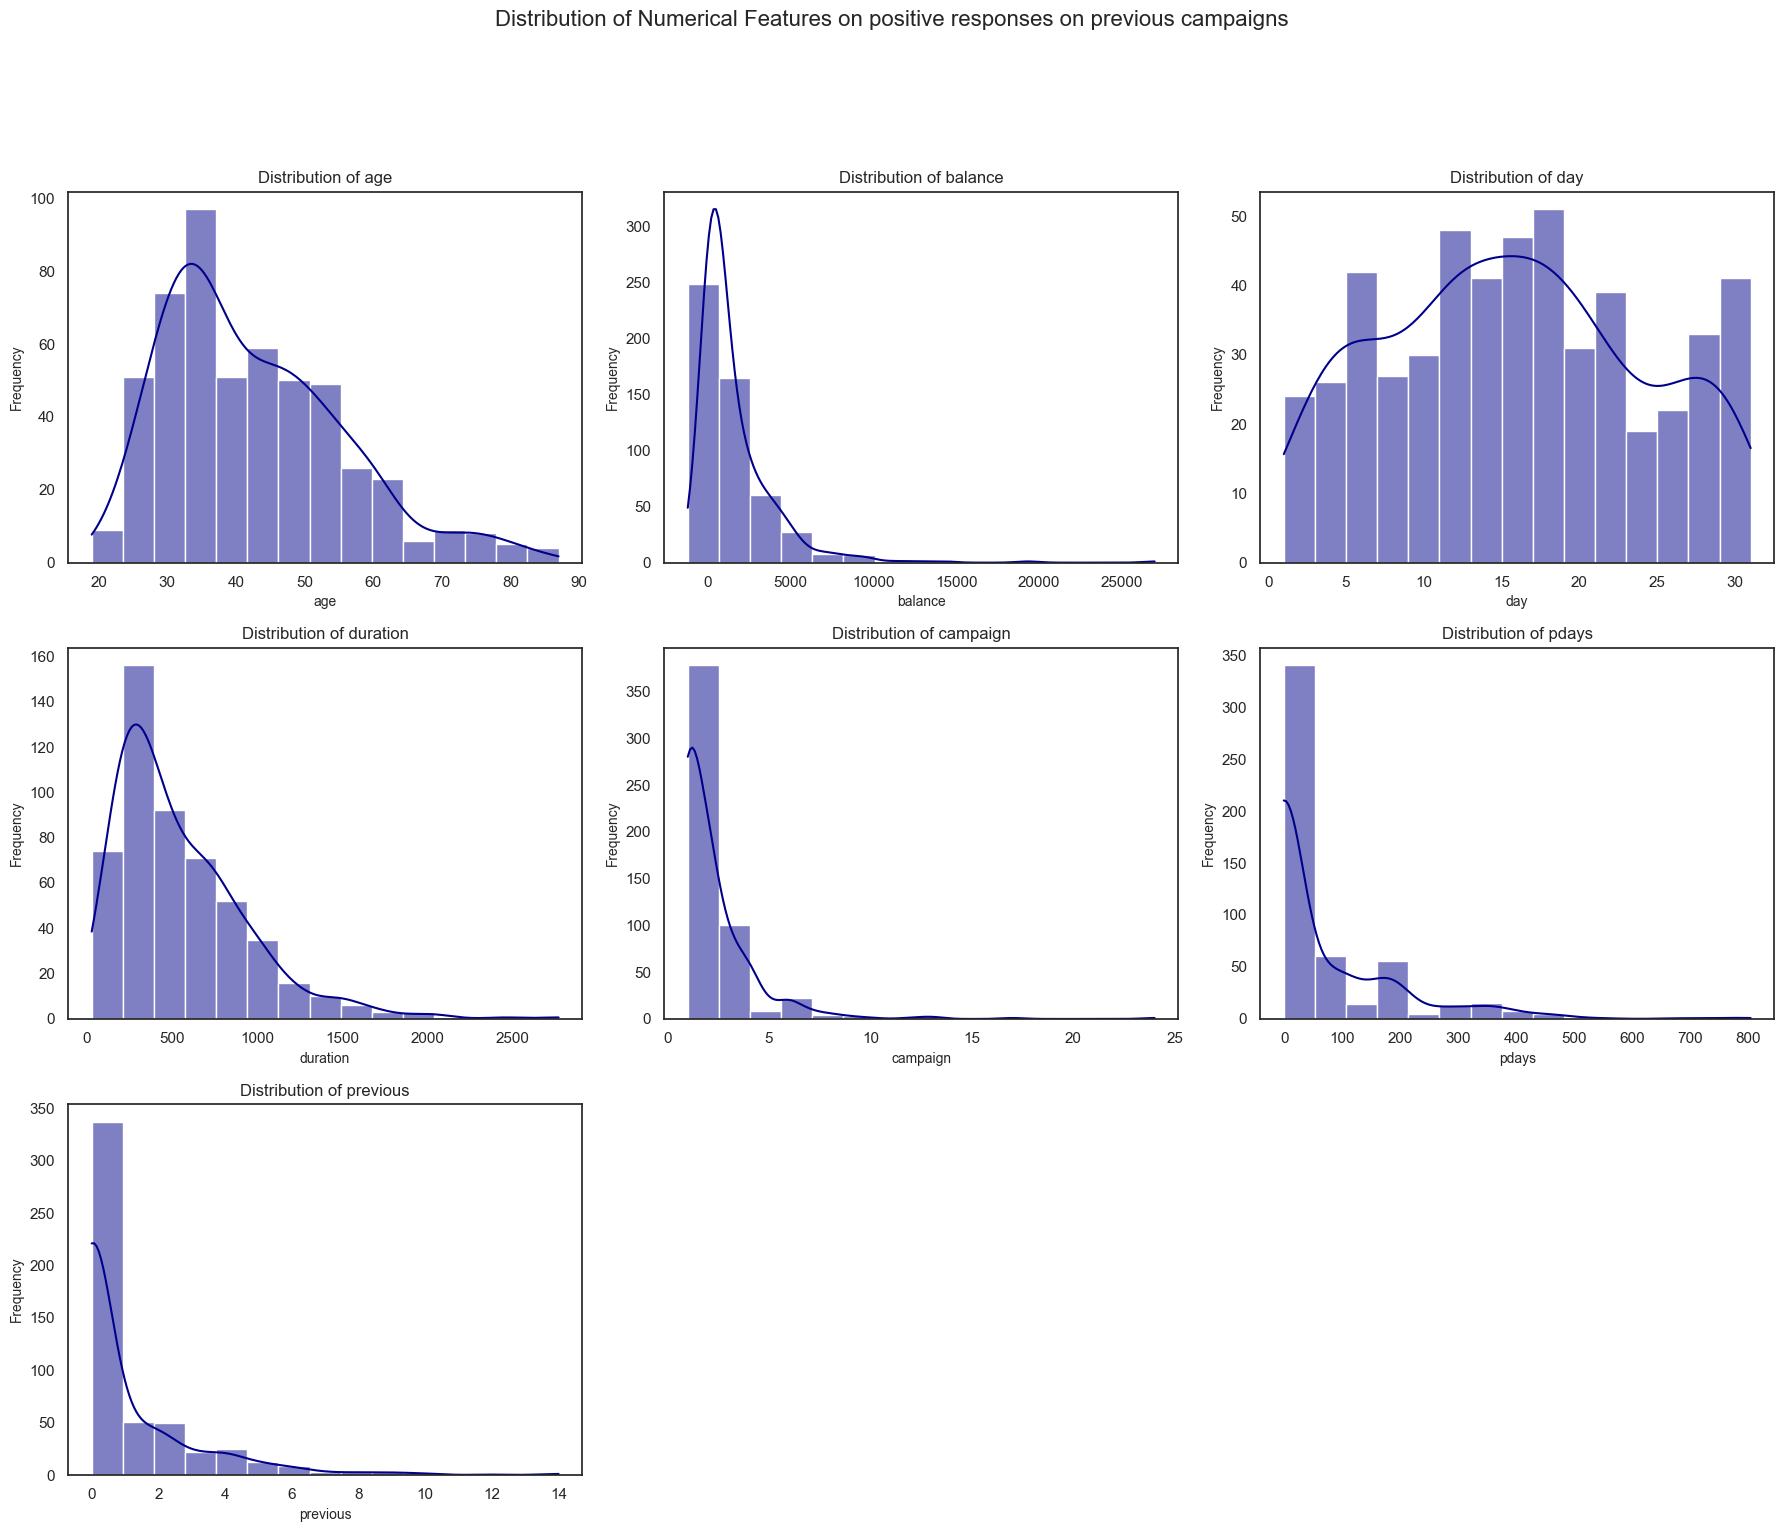

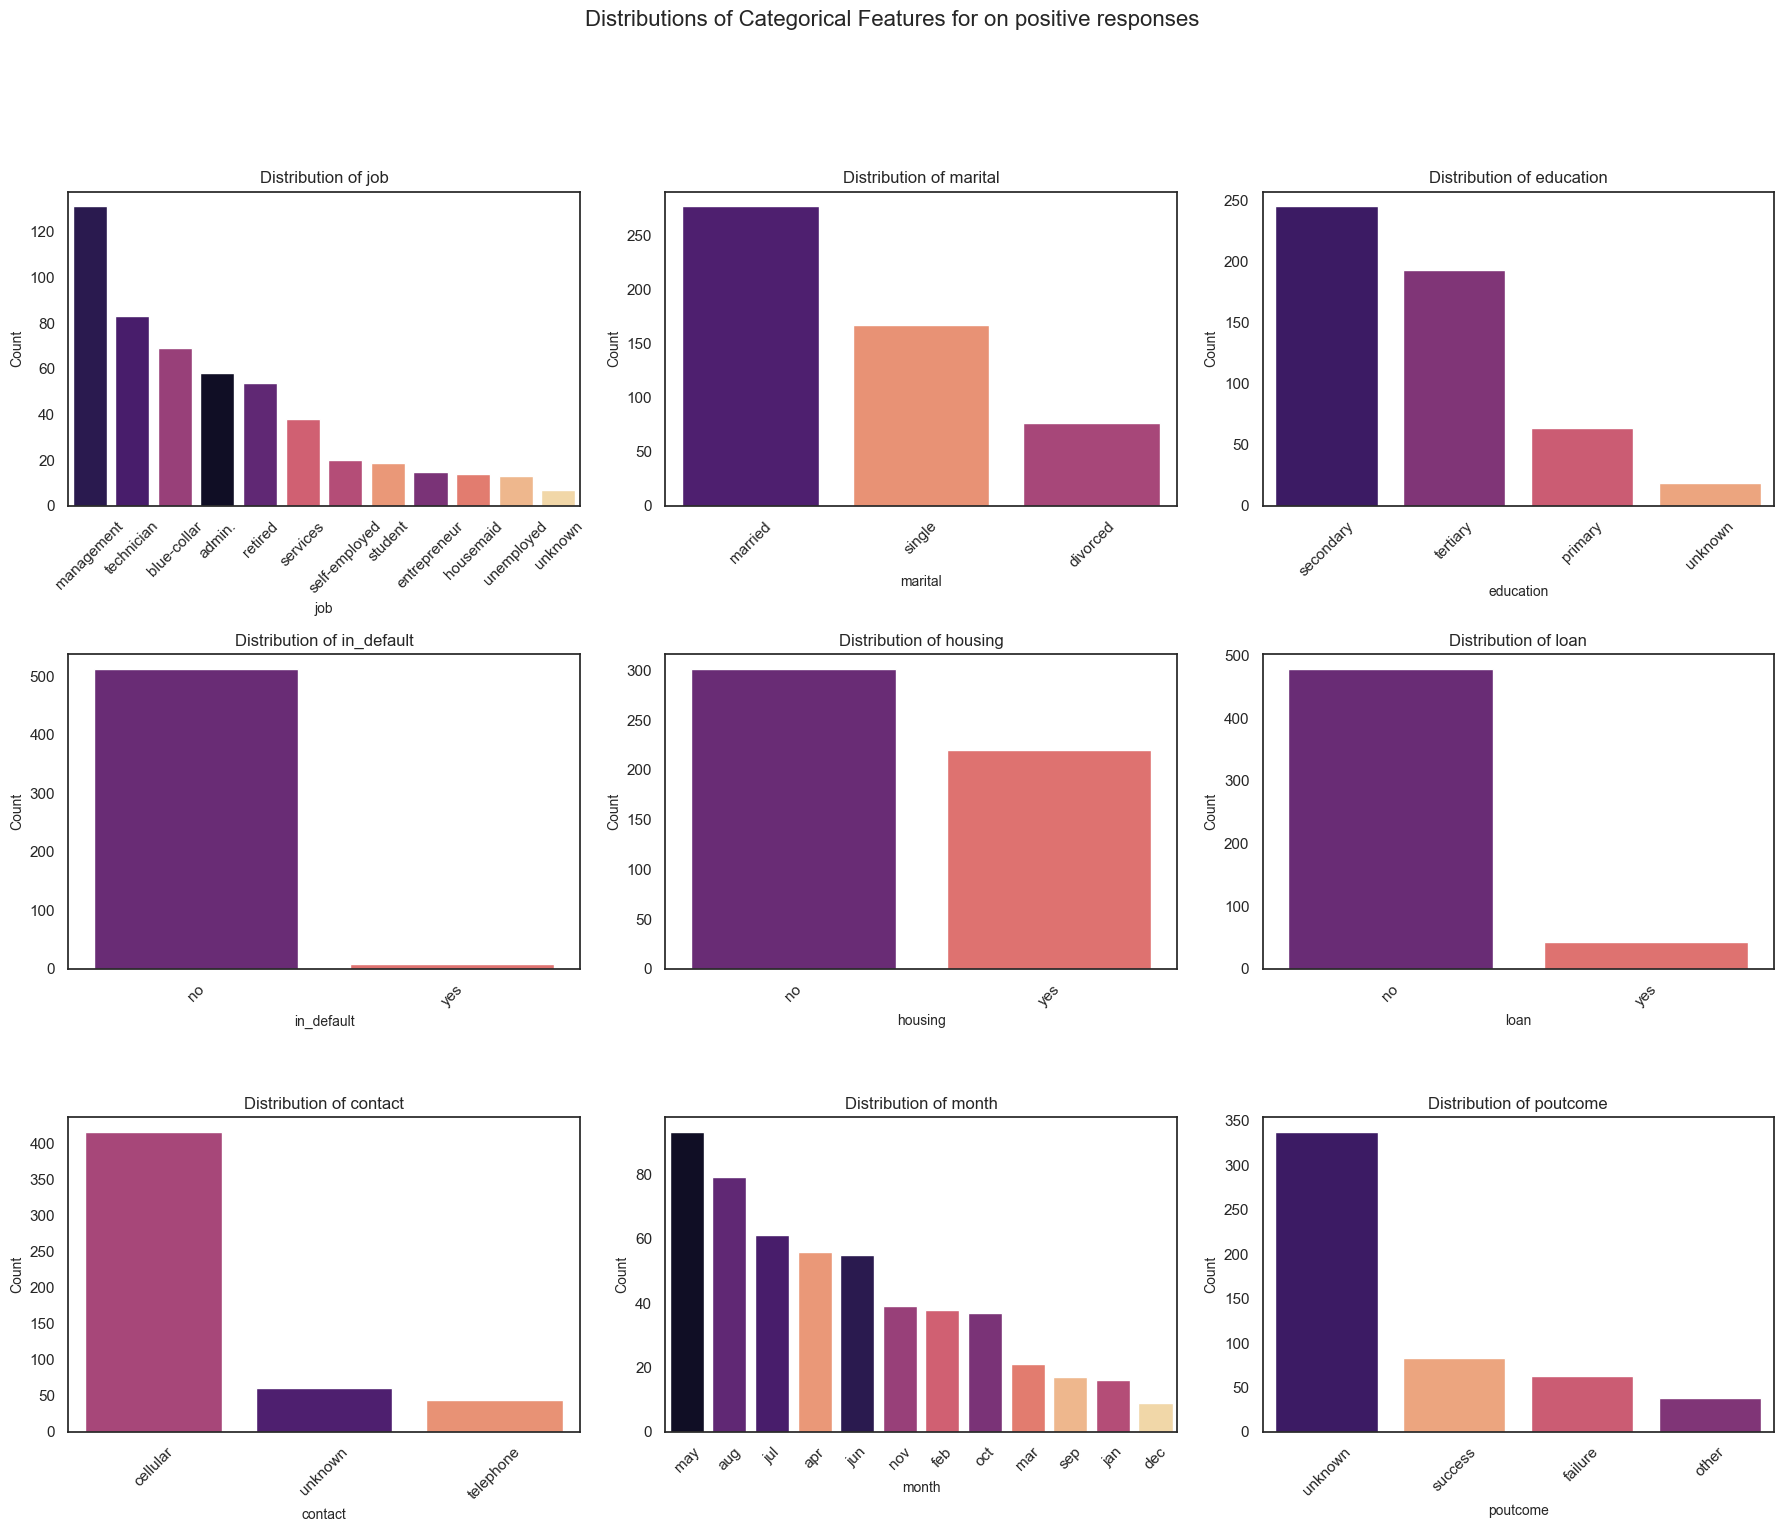

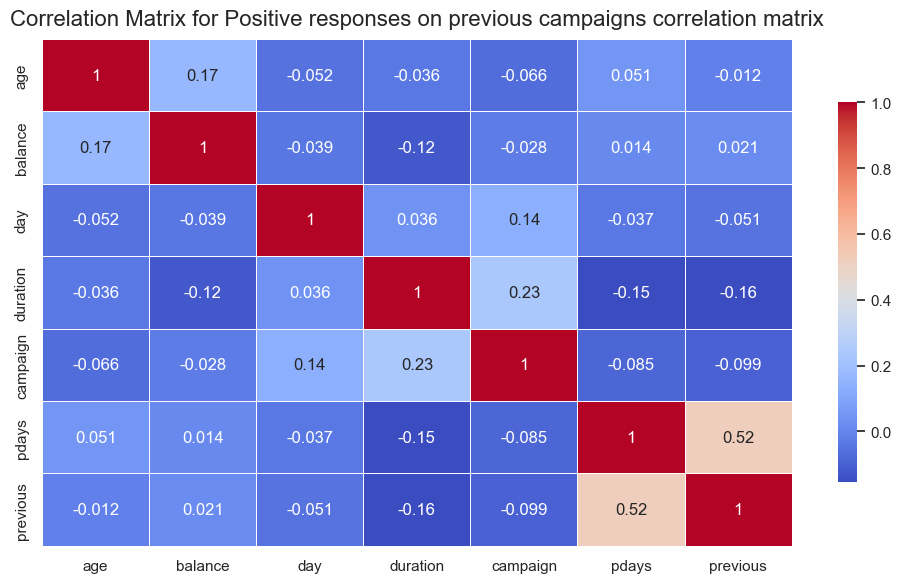

Correlation Matrix Table:
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.168447 -0.052070 -0.036333 -0.065831  0.050716 -0.011920
balance   0.168447  1.000000 -0.038578 -0.120070 -0.028038  0.013520  0.020503
day      -0.052070 -0.038578  1.000000  0.036100  0.137796 -0.037339 -0.051234
duration -0.036333 -0.120070  0.036100  1.000000  0.234318 -0.154891 -0.155493
campaign -0.065831 -0.028038  0.137796  0.234318  1.000000 -0.084879 -0.098632
pdays     0.050716  0.013520 -0.037339 -0.154891 -0.084879  1.000000  0.518231
previous -0.011920  0.020503 -0.051234 -0.155493 -0.098632  0.518231  1.000000


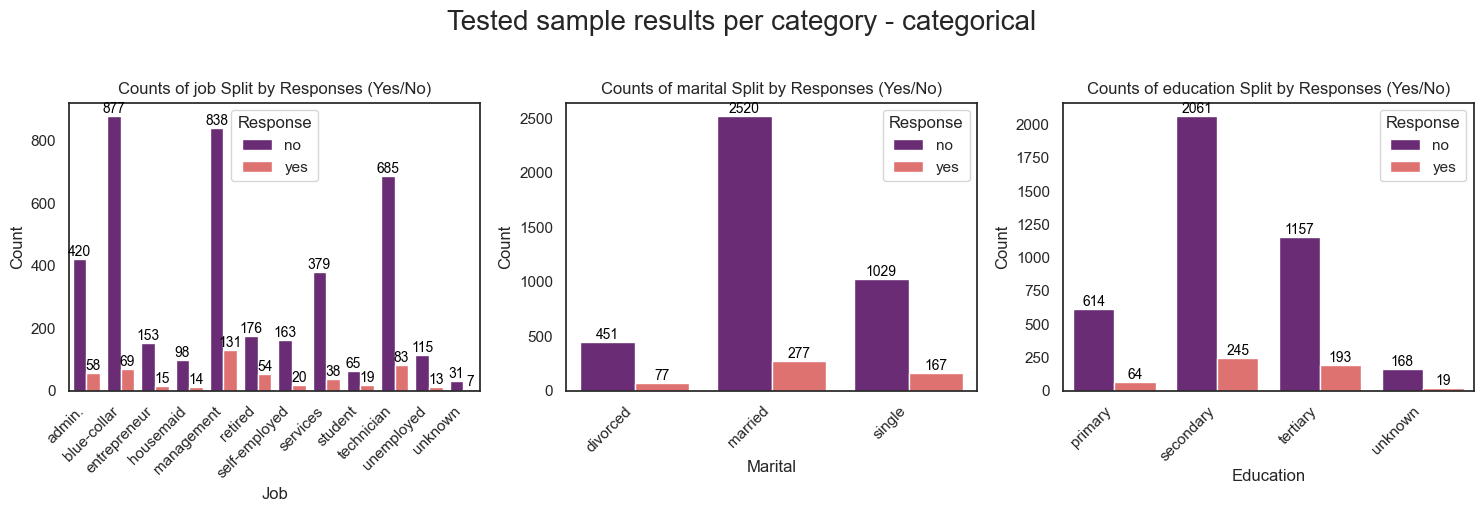

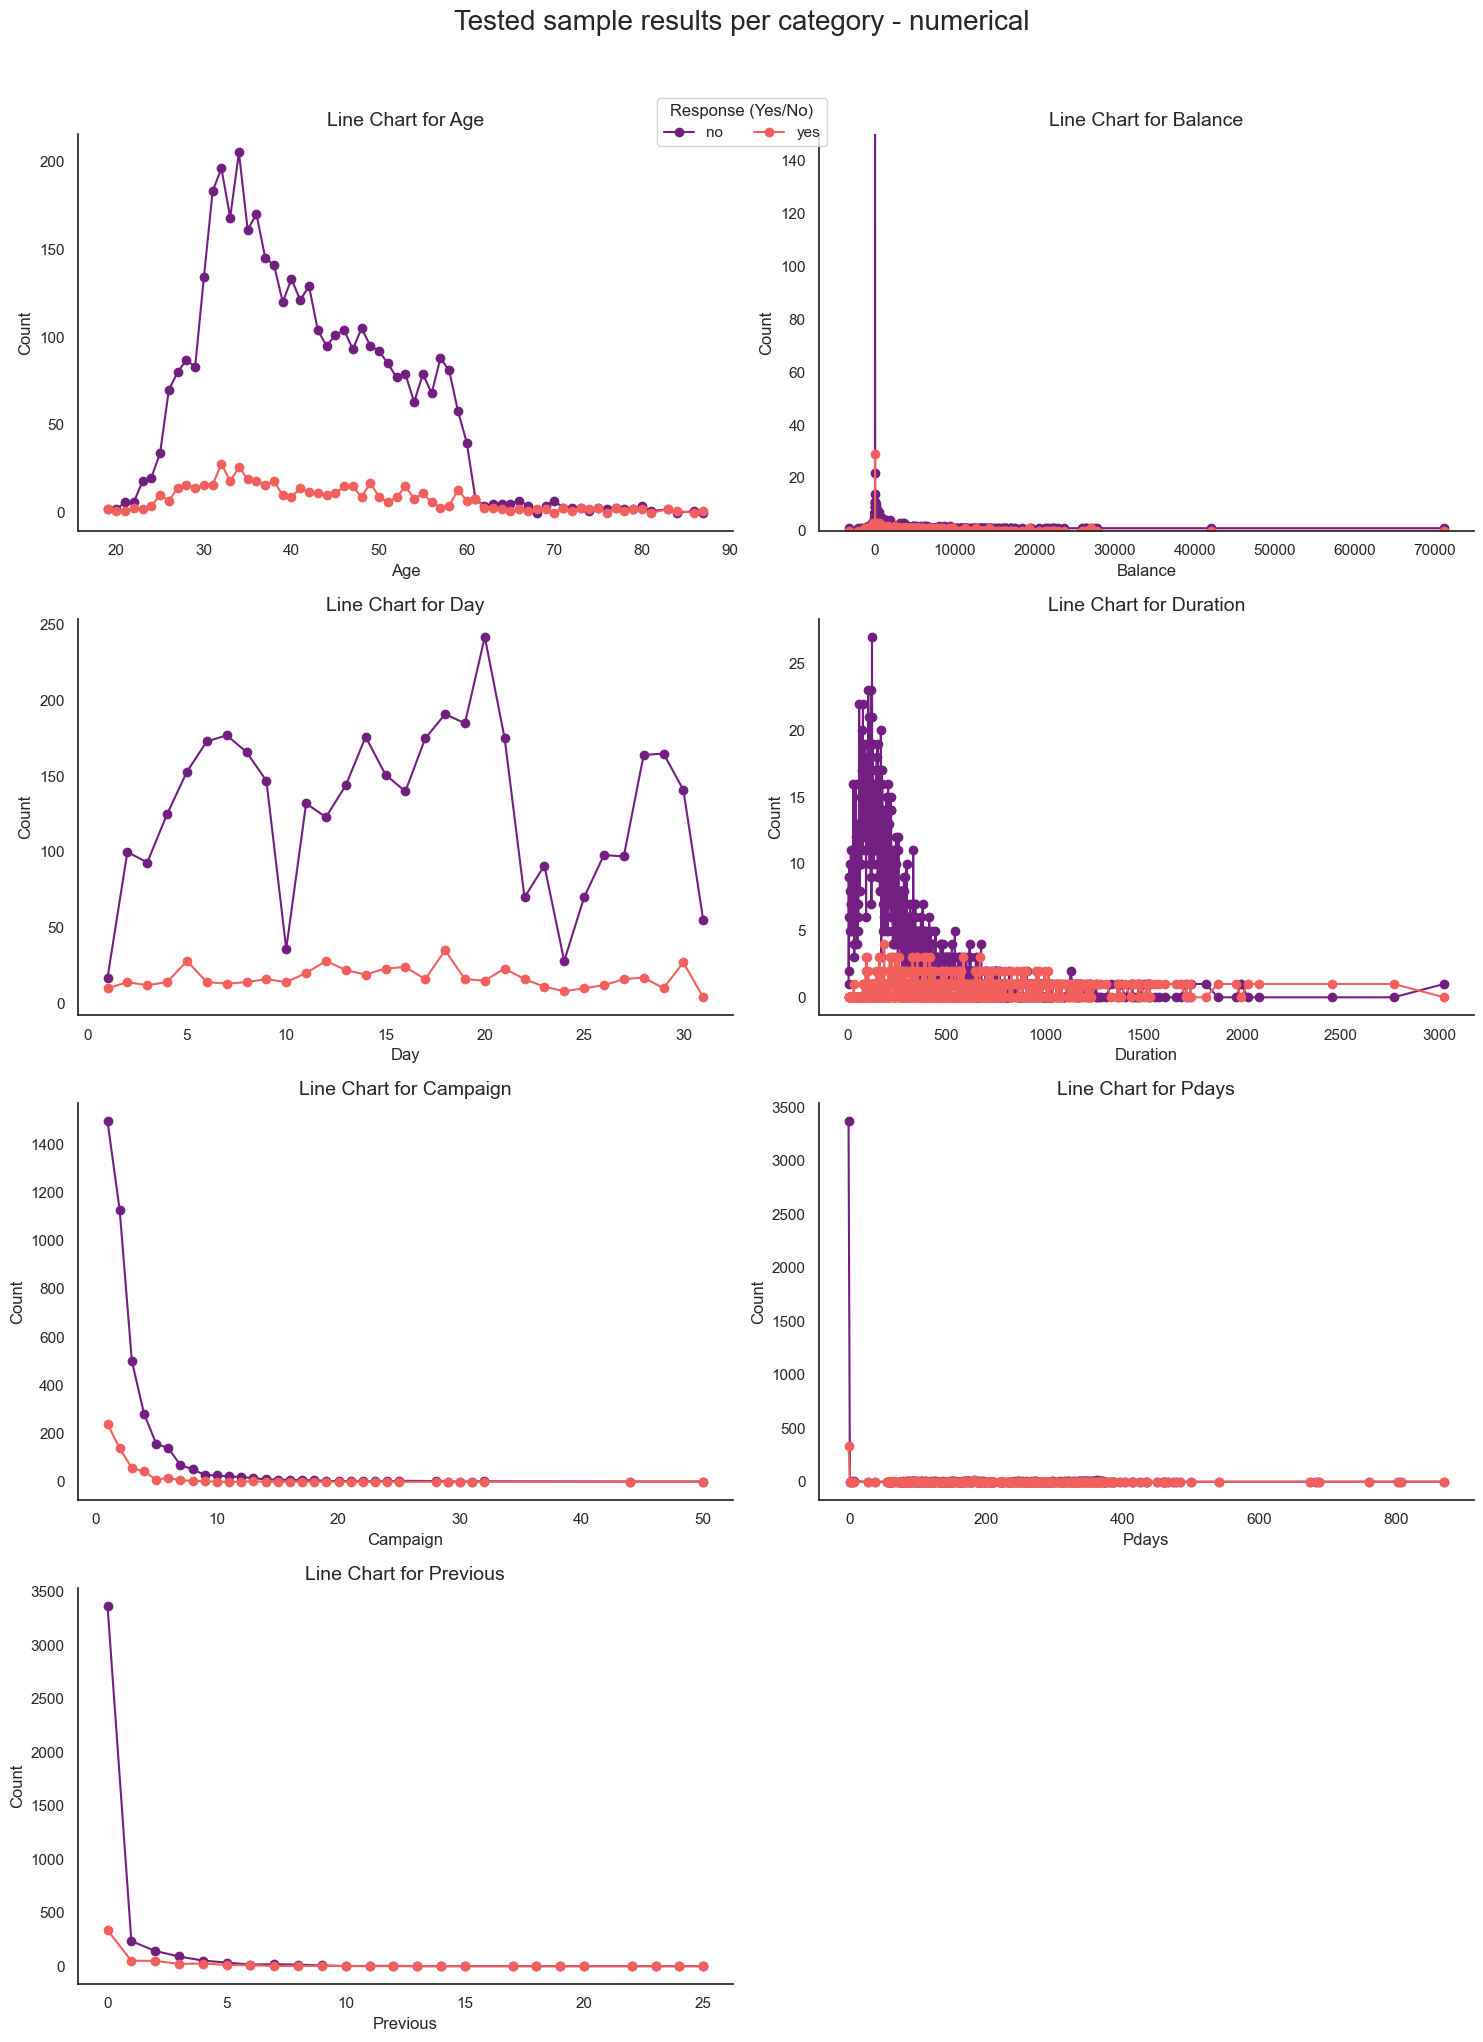

In [100]:
"""This module performs exploratory data analysis (EDA) on clients with positive responses to the previous campaign (Y = 'yes'). It focuses on records with 'yes'in the 'y' column. 
"""

#EDA for "yes clients

df_campaign_yes = df[df['y'] == 'yes']
df_campaign_yes_clean= df_campaign_yes.drop(columns = ['y'])

plot_numerical_features(df_campaign_yes_clean, "Distribution of Numerical Features on positive responses on previous campaigns")

# Plotting distribution of categorical features of all data
plot_categorical_features(df_campaign_yes_clean,3, "on positive responses")

# Plotting distribution of numerical features of all data
correlation_matrix(df_campaign_yes_clean, "Positive responses on previous campaigns correlation matrix")

df_campaign_yes.head()

grouped_bar_charts(df, "Tested sample results per category - categorical")
plot_line_chart_numerical(df, "Tested sample results per category - numerical")

Seems like longer time passed from the last contact and lower balance have higher distribution of positive response:


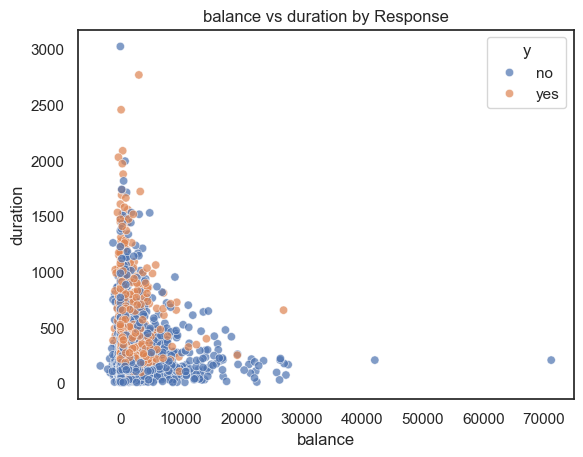

people are more likely to respond positively if we con't call them too often:


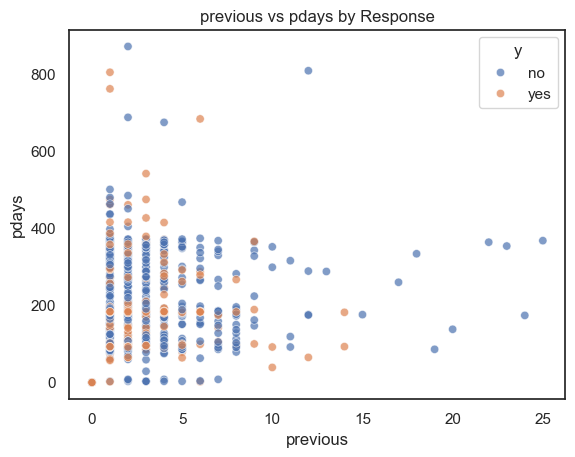

In [101]:
# Scatterplots
def scatterplot_byresponse(data_source, x_axes, y_axes):
        sns.scatterplot(data=data_source, x=x_axes, y=y_axes, hue='y', alpha=0.7)
        plt.title(f'{x_axes} vs {y_axes} by Response')
        plt.xlabel(x_axes)
        plt.ylabel(y_axes)
        plt.show()


print("Seems like longer time passed from the last contact and lower balance have higher distribution of positive response:")
scatterplot_byresponse(df, "balance", "duration")

print("people are more likely to respond positively if we con't call them too often:")
scatterplot_byresponse(df, "previous", "pdays")


Relationship between Yes, No, and Time from the Last Contact


C:\Users\pycho\AppData\Local\Temp\ipykernel_3312\4008686455.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="y", y="pdays", palette="magma")


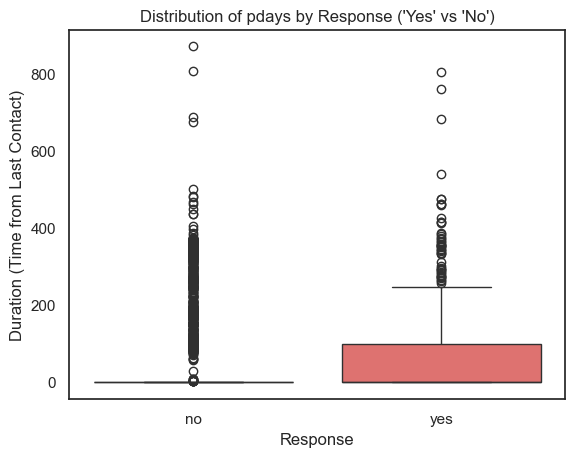

In [102]:
print("Relationship between Yes, No, and Time from the Last Contact")

# Convert `y` to counts

# Create a column with counts of 'y'
y_counts = df['y'].value_counts()
df['y_count'] = df['y'].map(y_counts)

# Check if 'duration' is numeric
if not pd.api.types.is_numeric_dtype(df['duration']):
    raise ValueError("Column 'duration' must be numeric.")

sns.boxplot(data=df, x="y", y="pdays", palette="magma")
plt.title("Distribution of pdays by Response ('Yes' vs 'No')")
plt.xlabel("Response")
plt.ylabel("Duration (Time from Last Contact)")
plt.show()

First few rows of the encoded DataFrame:
   age  balance  day  duration  campaign  pdays  previous  y_count  \
0   42      2.0    5       380         1     -1         0     4000   
1   43    593.0    5        55         1     -1         0     4000   
2   57    162.0    5       174         1     -1         0     4000   
3   57    839.0    5       225         1     -1         0     4000   
4   59      0.0    5       226         1     -1         0     4000   

   job_blue-collar  job_entrepreneur  ...  education_unknown  in_default_yes  \
0              0.0               1.0  ...                0.0             1.0   
1              0.0               0.0  ...                0.0             0.0   
2              0.0               0.0  ...                0.0             0.0   
3              0.0               0.0  ...                0.0             0.0   
4              1.0               0.0  ...                0.0             0.0   

   housing_yes  loan_yes  contact_telephone  contact_unkn

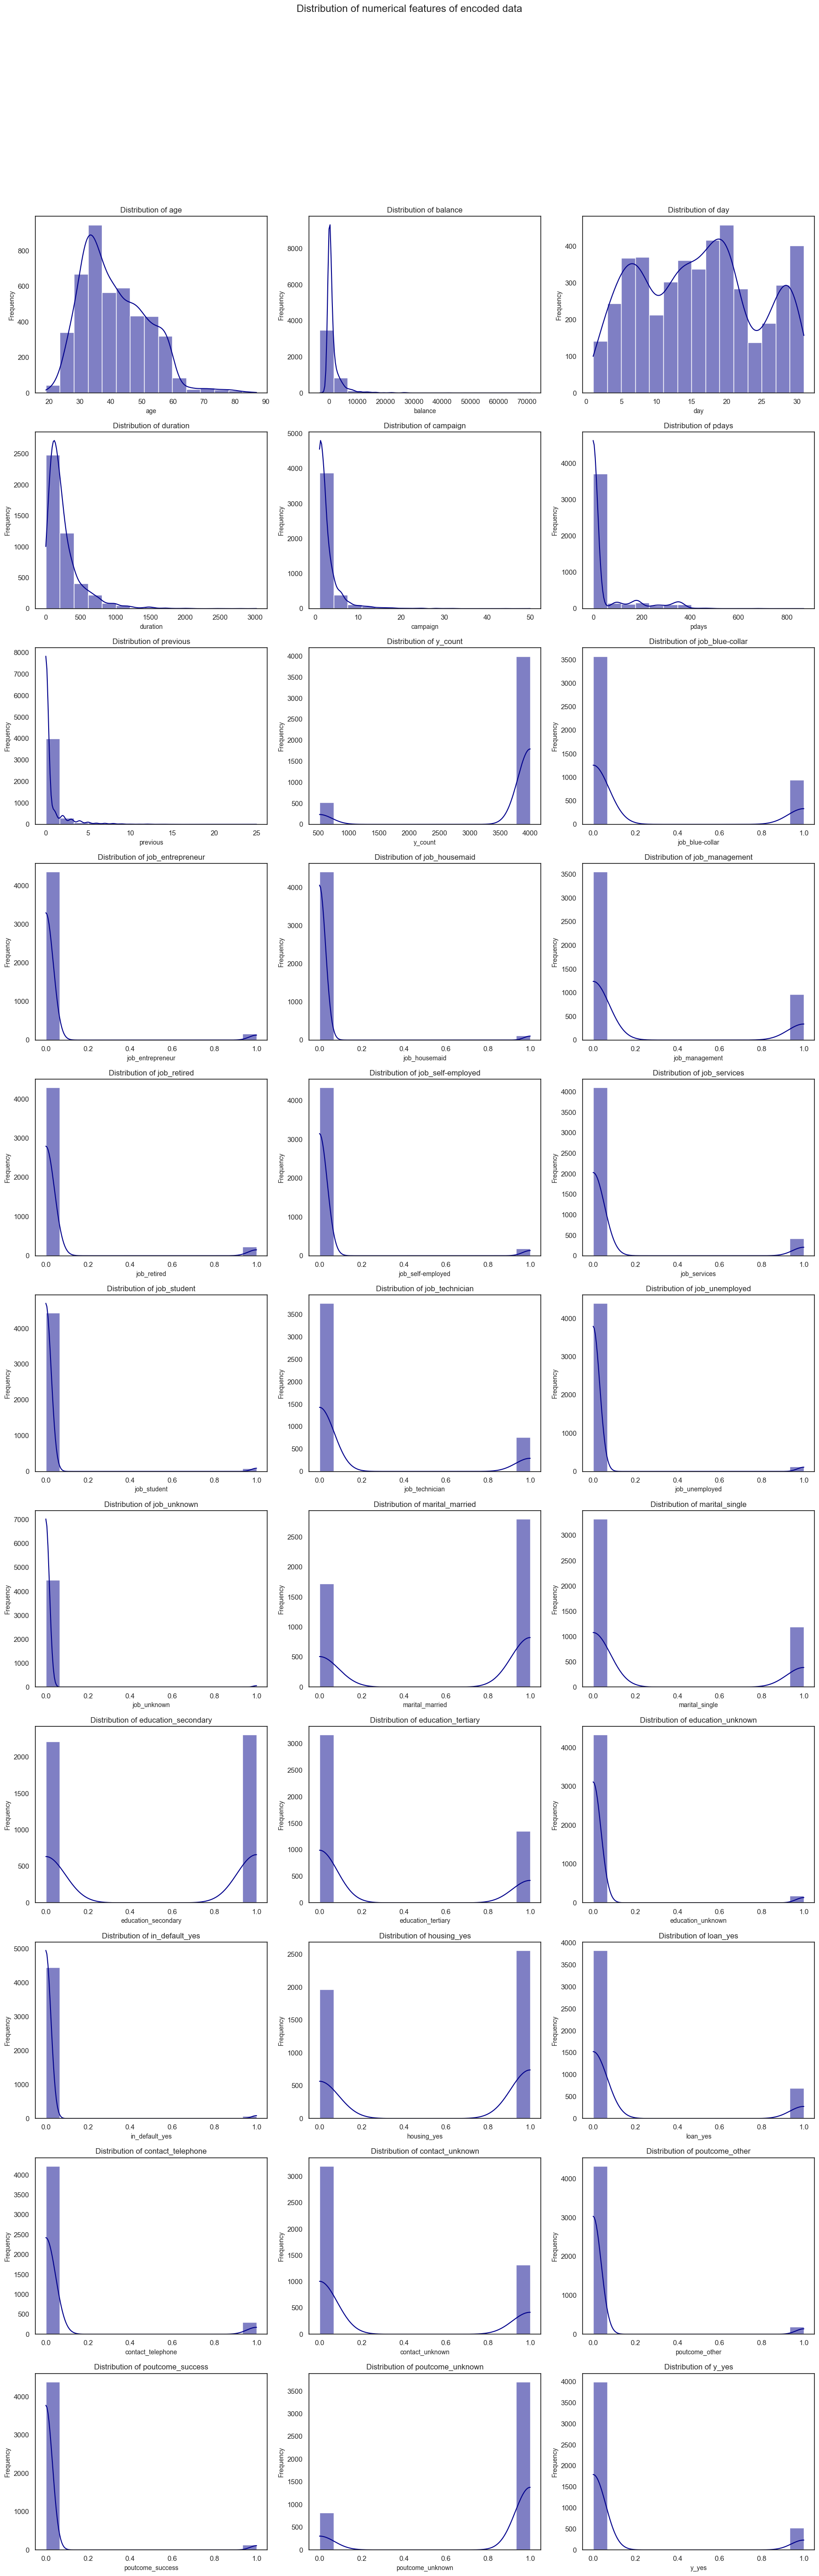

In [103]:

encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_features = df.select_dtypes(include=['object']).columns
encoded_features = encoder.fit_transform(df[categorical_features])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded features with the original DataFrame
encoded_df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1).drop(columns=categorical_features)
encoded_df_adjusted = encoded_df.loc[:, ~encoded_df.columns.str.startswith('month_')]

# Display the first few rows of the encoded DataFrame
print("First few rows of the encoded DataFrame:")
print(encoded_df_adjusted.head())

# Distribution of numerical features
plot_numerical_features(encoded_df_adjusted, "Distribution of numerical features of encoded data")



# numerical_features = encoded_df.select_dtypes(include=['int64', 'float64']).columns
# if not numerical_features.empty:
#     encoded_df[numerical_features].hist(bins=15, figsize=(15, 6))
#     plt.suptitle('Distribution of Numerical Features')
#     plt.show()
# else:
#     print("No numerical features found.")

# # Distribution of categorical features
# categorical_features = encoded_df.select_dtypes(include=['object']).columns
# if not categorical_features.empty:
#     for feature in categorical_features:
#         plt.figure(figsize=(10, 4)) 
#         sns.countplot(data=df, x=feature)
#         plt.title(f'Distribution of {feature}')
#         plt.xticks(rotation=45)
#         plt.show()
# else:
#     print("No categorical features found.")

# # Correlation matrix
# correlation_matrix = encoded_df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

# # Display correlation matrix as a table
# print("Correlation Matrix Table:")
# print(correlation_matrix)



In [104]:
# Checking for Multicollinearity in the Encoded DataFrame

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop specified columns
encoded_df = encoded_df.drop(columns=['campaign_id', 'account_id', 'outcome_id'])
# Calculate VIF for each feature
def calculate_vif(encoded_df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = encoded_df.columns
    vif_data["VIF"] = [variance_inflation_factor(encoded_df.values, i) for i in range(len(encoded_df.columns))]
    return vif_data

# Calculate VIF for encoded_df
vif_df = calculate_vif(encoded_df)

# Display the VIF values
print("Variation Inflation Factor (VIF) for each feature:")
print(vif_df)

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(encoded_df)

# Perform PCA
pca = PCA(n_components=2)  # You can change the number of components
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
print(df_pca.head())

# Plot the principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()